In [2]:
import numpy as np
import h5py
import pandas as pd
from glob import glob
import os
import re
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mticker
# settings
color_pal = sns.color_palette()
plt.style.use("fivethirtyeight")

import PyBlastAfterglowMag as PBA
from ejecta import ProcessRaw
from settings import *

np.set_printoptions(precision=2)

In [3]:
# Collate data for simulations (USE ONLY ONCE)
for sim_key, sim_dic in SIMULATIONS.items():
    pr = ProcessRaw(simumlation=sim_dic)
    # pr.process_raw_ejecta_files(infiles= "ejecta_*.h5", fname_output= "ej_collated.h5", mode="mass")

In [4]:
# dataframe for all simulations
df = pd.DataFrame(SIMULATIONS).T

In [5]:
# collect tmin tmax for all simulations
df["tmin"],df["tmax"] = pd.Series(dtype = 'object'), pd.Series(dtype = 'object')
for sim, sim_dic in df.iterrows():
    data = PBA.id_kenta.EjectaData(sim_dic["datadir"]+"ej_collated.h5",verbose=True)
    df["tmin"][sim] = np.array(data.getText().min())
    df["tmax"][sim] = np.array(data.getText().max())
print(df[["idx","tmin","tmax"]])

                 idx                  tmin                tmax
SFHo_q1_res150     0     4.986821174621582  56.988121032714844
SFHo_q111_res150   1  0.028825554996728897  58.025840759277344
SFHo_q116_res150   2    13.000324249267578   90.02220916748047
SFHo_q116_res200   3    3.0362918376922607   78.98201751708984
SFHo_q125_res150   4  0.028825554996728897   74.97526550292969
SFHo_q125_res200   5    54.321754455566406    61.0092887878418
BHBLp_q1_res150    6  0.057651109993457794   40.98994064331055


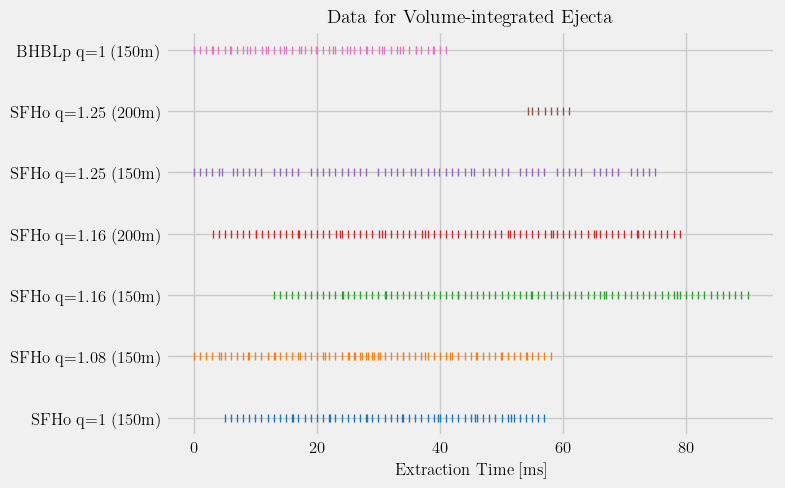

In [6]:
# Plot extraction time for all simulations
fig, ax = plt.subplots(figsize=(7,5))
for sim, sim_dic in df.iterrows():
    # ax.plot([sim_dic["tmin"],sim_dic["tmax"]],[sim_dic["idx"],sim_dic["idx"]], 
            # marker="o", color=color_pal[sim_dic["idx"]], )
    data = PBA.id_kenta.EjectaData(sim_dic["datadir"]+"ej_collated.h5",verbose=True)
    ax.plot(data.getText(), np.full_like(data.getText(),sim_dic["idx"]), 
            marker="|", color=color_pal[sim_dic["idx"]], linestyle="None")

ticks_loc = ax.get_yticks().tolist()
ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc))
ax.set_yticklabels(["-1"] + df["label"].to_list() + ["10"],fontsize=12)
ax.set_xlabel("Extraction Time [ms]", fontsize=12)
ax.tick_params(labelsize=12)
ax.minorticks_on()
ax.set_title("Data for Volume-integrated Ejecta",fontsize=14)
plt.show()

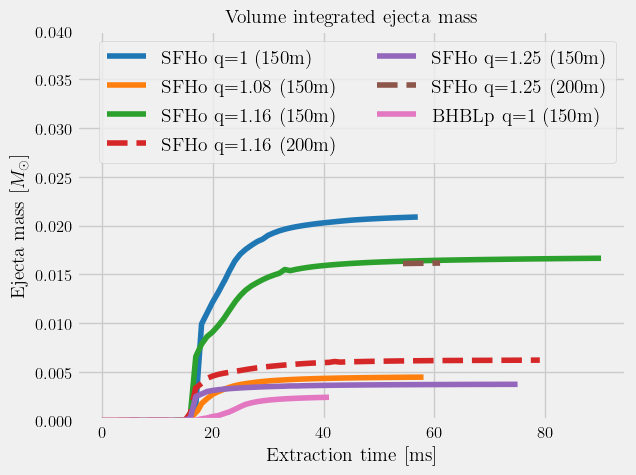

In [7]:
# Ejecta mass evolution of all simulations
def plot_all_sim_ejecta_mass(crit=None,yscale="linear",ylim=(0,0.04),title="Volume integrated ejecta mass"):
    fig, ax = plt.subplots(ncols=1,nrows=1)
    #ax2 = ax.twinx()
    for sim, sim_dic in df.iterrows():
        ej = PBA.id_kenta.EjectaData(sim_dic["datadir"]+"ej_collated.h5",verbose=True)
        if (crit is None):
            mass = ej.total_mass()
        else:
            mass = ej.total_mass_vs_text(crit=crit)

        if sim_dic["res"] == 150:
            ax.plot(ej.getText(), mass, color=color_pal[sim_dic["idx"]],
                label=sim_dic["label"],ls="-")
        else:
            ax.plot(ej.getText(), mass, color=color_pal[sim_dic["idx"]],
                label=sim_dic["label"],ls="--")
        # data = PBA.id_kenta.Data(fpath_rhomax=sim_dic["datadir"]+sim_dic["rhomax"],
        #                          fpath_mdot=sim_dic["datadir"]+sim_dic["mdot_extract"])
        # ax.plot(ej.getText(), ej.total_mass_fasttail(),color=color_pal[sim_dic["idx"]],
        #         label=r"$\Gamma\beta>1$",ls="--")
        # ax2.plot(*data.get_rhomax(),color=color_pal[sim_dic["idx"]],label=r"$\rho_{\rm max}$",ls=":")
        # ax2.plot(*data.get_mdot(),color=color_pal[sim_dic["idx"]],label=r"$\dot{M}$",ls="-.")
    ax.tick_params(labelsize=12)
    ax.set_ylim(*ylim)
    ax.set_yscale(yscale)
    ax.legend(fontsize=14,ncol=2)
    # ax.set_yscale("log")
    ax.set_xlabel("Extraction time [ms]",fontsize=14)
    ax.set_ylabel(r"Ejecta mass $[M_{\odot}]$",fontsize=14)
    ax.set_title(title,fontsize=14)
    # ax.grid(which="both",axis="both")
    plt.tight_layout()
    plt.savefig(os.getcwd()+"/"+"ejecta_mass_evol.png",dpi=256)
    plt.show()
plot_all_sim_ejecta_mass()

/home/vsevolod/anaconda3/envs/PyBlastAfterglow/lib/python3.9/site-packages/PyBlastAfterglowMag/utils.py:51: RuntimeWarning: invalid value encountered in sqrt
  get_Gamma = lambda beta: np.float64(np.sqrt(1. / (1. - np.float64(beta) ** 2.)))


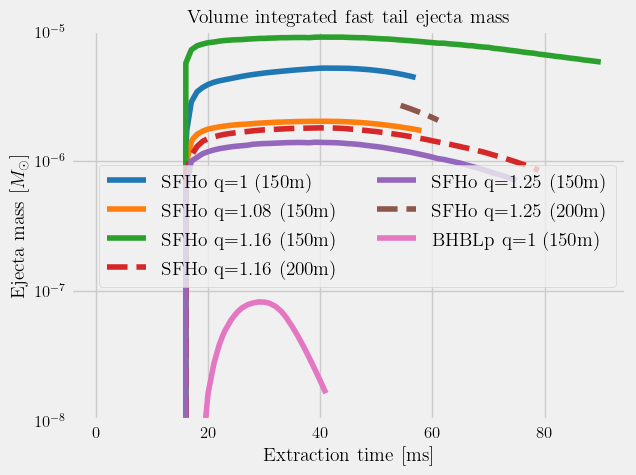

In [8]:
# Ejecta mass fast tail evolution of all simulations
plot_all_sim_ejecta_mass(crit="fast",yscale="log",ylim=(1e-8,1e-5),
                         title="Volume integrated fast tail ejecta mass")

# ONE SIMULATION: BHBLp q=1 (150m)

In [9]:
sim_dic = SIMULATIONS["BHBLp_q1_res150"]
ej_data = PBA.id_kenta.EjectaData(sim_dic["datadir"]+"ej_collated.h5",verbose=True)
data = PBA.id_kenta.Data(fpath_rhomax=sim_dic["datadir"]+sim_dic["rhomax"],
                         fpath_mdot=sim_dic["datadir"]+sim_dic["mdot_extract"])

/home/vsevolod/anaconda3/envs/PyBlastAfterglow/lib/python3.9/site-packages/PyBlastAfterglowMag/utils.py:51: RuntimeWarning: invalid value encountered in sqrt
  get_Gamma = lambda beta: np.float64(np.sqrt(1. / (1. - np.float64(beta) ** 2.)))


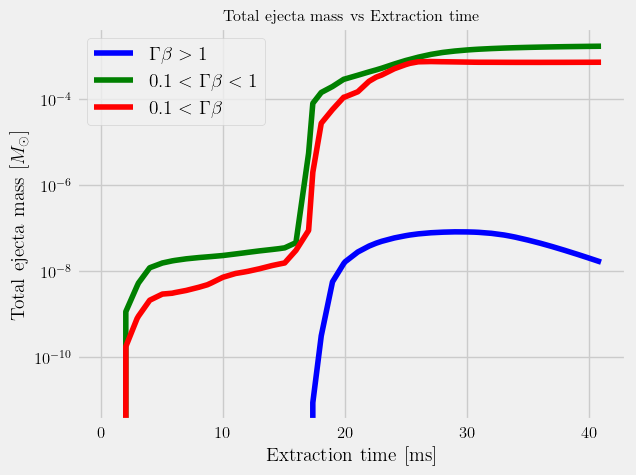

In [10]:
def plot_ejecta_mass_components_text(dd:PBA.id_kenta.EjectaData):

    fig, ax = plt.subplots(ncols=1,nrows=1)
    
    ax.plot(dd.getText(),dd.total_mass_vs_text(crit="fast"),color="blue",label=r"$\Gamma\beta > 1$")
    ax.plot(dd.getText(),dd.total_mass_vs_text(crit="mid"),color="green",label=r"$0.1 < \Gamma\beta < 1$")
    ax.plot(dd.getText(),dd.total_mass_vs_text(crit="slow"),color="red",label=r"$0.1 < \Gamma\beta$")
    # ax.plot([text_max_mass],[max_mass],marker='d',color='blue')

    ax.tick_params(labelsize=12)
    # ax.set_ylim(0,0.04)
    ax.set_yscale("log")
    ax.legend(fontsize=14,ncol=1)
    # ax.set_yscale("linear")
    ax.set_xlabel("Extraction time [ms]",fontsize=14)
    ax.set_ylabel(r"Total ejecta mass $[M_{\odot}]$",fontsize=14)
    ax.set_title("Total ejecta mass vs Extraction time")
    # ax.grid(which="both",axis="both")
    plt.tight_layout()
    plt.savefig(os.getcwd()+"/"+f"mass_components_{sim_dic['name']}.png",dpi=256)
    plt.show()
plot_ejecta_mass_components_text(dd=ej_data)

In [11]:
# plot one simulation
#df = pd.merge(data.df_mdot,data.df_rho,how="left",on="time")

# for key, series in data.df_mdot.items():
#     if (np.sum((series == 0).astype(int)) == len(series)):
#         print(f"{key} \t zeroes n={np.sum((series == 0).astype(int))}/{len(series)}")
#     if (np.sum((series == 0).astype(int)) > len(series)*.5):
#         print(f"{key} \t zeroes n={np.sum((series == 0).astype(int))}/{len(series)}")

#print(data.df_mdot.keys())
#print(data.df_rho.keys())

# print(df.shape)
# print(data.df_mdot.keys())
# print("Null")
# print(data.df_mdot.isnull().sum(axis=0))
# print("Nans")
# print(data.df_mdot.isna().sum(axis=0))

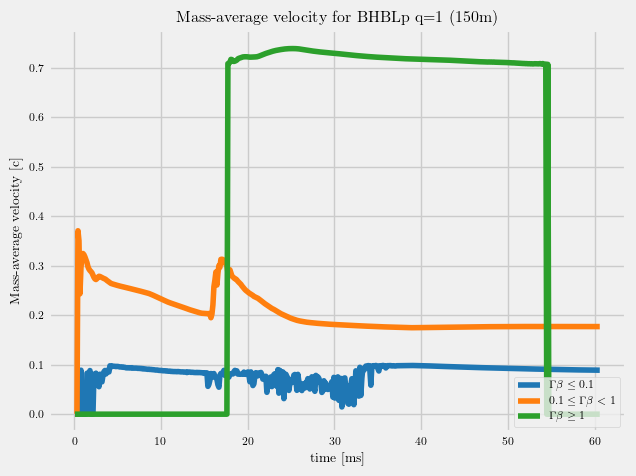

In [12]:
# Plot velocities
def plot_mdot_vave(df : pd.DataFrame):
    fig, ax = plt.subplots(ncols=1,nrows=1)
    ax.plot(df["time"], df[f"vave_slow"],color=color_pal[0],label=r"$\Gamma\beta \leq 0.1$")
    ax.plot(df["time"], df[f"vave_mid"],color=color_pal[1],label=r'$0.1 \leq \Gamma\beta < 1$')
    ax.plot(df["time"], df[f"vave_fast"],color=color_pal[2],label=r'$\Gamma\beta \geq 1$')
    # ax.set_yscale("log")
    ax.legend()
    ax.set_xlabel("time [ms]")
    ax.set_ylabel("Mass-average velocity [c]")
    # ax.set_ylim(1e-9,1e-2)
    ax.legend(loc='lower right')
    plt.title(f"Mass-average velocity for {sim_dic['label']}")
    plt.tight_layout()
    plt.savefig(f"./vave_{sim_dic['name']}.png",dpi=256)
    plt.show()
plot_mdot_vave(df=data.df_mdot)

In [13]:
# Definition of a retarded time for ejecta mass flux
def get_tret(r : float, vinf_ave0 : float =.7) -> float:
    vinf_ave0 = .7
    return (r*1000.*100./vinf_ave0/PBA.utils.cgs.c) * 1e3 # ms
def get_tret_arr(r : float, vinf_ave0 : np.ndarray) -> np.ndarray:
    vinf_ave0 = .7
    return (r*1000.*100./vinf_ave0/PBA.utils.cgs.c) * 1e3 # ms

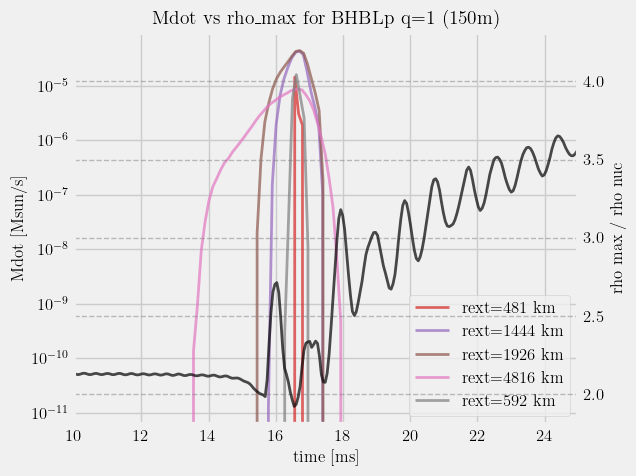

In [14]:
def plot_rho_mdot_rext() -> None:
    rext = data.get_rext()
    fig, ax = plt.subplots(ncols=1,nrows=1)

    time = data.df_mdot["time"]

    for i, r in enumerate(rext):
        tret = get_tret(r=r) # ms
        tret = get_tret_arr(r=r,vinf_ave0=data.df_mdot[f"vave_fast"]) # ms
        if np.sum(data.df_mdot[f"mdot_fast_r{r}"]) > 0:
            ax.plot(time - tret, data.df_mdot[f"mdot_fast_r{r}"],color=color_pal[i], label=f"rext={r} km",lw=2,alpha=.7)

    # for i, r in enumerate(rext):
        # ax.plot(data.df_mdot["time"], data.df_mdot[f"mdot_fast_r{r}"],color=color_pal[i])
        # ax.plot(data.ret_time(r0=r,vave_key="vave_fast"), data.df_mdot[f"mdot_fast_r{r}"],color=color_pal[i])
        # df.plot("time",f"mdot_fast_r{r}",ax=ax,color=color_pal[i])

    ax2 = ax.twinx()
    ax2.plot(data.df_rho["time"], data.df_rho[f"rho_max"],color='black',lw=2,alpha=.7)

    # df.plot("time",f"rho_max",ax=ax2,color="black")

    ax.set_xlabel("time [ms]", fontsize=12)
    ax.set_ylabel("Mdot [Msun/s]", fontsize=12)
    ax2.set_ylabel("rho max / rho nuc", fontsize=12)
    ax.set_yscale("log")
    # ax2.set_yscale("log")
    # ax.grid(color='black')
    ax2.grid(color='gray',ls='--',alpha=.5)
    ax2.tick_params(labelsize=12)
    ax.set_xlim(10,25)
    ax.legend(loc='lower right', fontsize=12)
    ax.tick_params(labelsize=12)
    plt.title(f"Mdot vs rho_max for {sim_dic['label']}", fontsize=14)
    plt.tight_layout()
    plt.savefig(f"./mdot_rhomax_{sim_dic['name']}.png",dpi=256)
    plt.show()
    
    # data.df_mdot.plot("time","mdot_fast_r48")
    # data.df_mdot.plot("time","mdot_fast_r144")
    # data.df_mdot.plot("time","mdot_fast_r482")
    # data.df_mdot.plot("time","mdot_fast_r144")
plot_rho_mdot_rext()

In [15]:
print(data.get_rext())
def plot_mass_mdot_rho(sim_dic : dict, r=592) -> None:
    tret = get_tret(r=r) # ms
    tret = get_tret_arr(r=r,vinf_ave0=data.df_mdot[f"vave_fast"]) # ms

    fig, ax = plt.subplots(ncols=1,nrows=1)
    ax.plot(ej_data.getText(), ej_data.total_mass(), color="gray",label="Total")
    ax.plot(ej_data.getText(), ej_data.total_mass_vs_text(crit="fast"),color="black",label=r"$\Gamma\beta>1$")
    
    
    ax.plot(data.df_mdot["time"] - tret, data.df_mdot[f"mdot_fast_r{r}"],color="red", label=f"Mdot")
    
    ax.set_ylim(1e-9,1e-2)
    ax.set_yscale("log")
    
    ax2 = ax.twinx()
    ax2.plot(data.df_rho["time"], data.df_rho[f"rho_max"],label=r"$\rho_{\rm max}$")  
    # data.df_rho.plot("time","rho_max",ax=ax2,color="green",label=r"$\rho_{\rm max}$")
    # data.df_mdot.plot("time","mdot_r481",ax=ax2,color="pink",label=r"$\dot{M}_{\rm ej}$")
    ax2.set_yscale("log")
    ax.set_xlim(10,30)
    ax.set_xlabel("time [ms]",fontsize=12)
    ax.set_ylabel("Ejecta mass \& mass flux", color="black",fontsize=12)
    ax2.set_ylabel("rho max / rho nuc", color="blue",fontsize=12)
    ax.legend(fontsize=12)
    ax.tick_params(labelsize=12)
    ax2.tick_params(labelsize=12)
    ax2.legend(fontsize=12)
    plt.tight_layout()
    plt.savefig(f"./mdot_mej_rhomax_{sim_dic['name']}.png",dpi=256)
    plt.show()
# plot_mass_mdot_rho(sim_dic=sim_dic)

[  24   48  144  481 1444 1926 4816  592]


In [17]:
# Sumamry
def print_summary(dd):
    max_mass = np.max(dd.total_mass_vs_text(crit="fast"))
    text_max_mass = dd.getText()[np.argmax(dd.total_mass_vs_text(crit="fast"))]

    print(f"\nMaximum fast of the fast tail: {max_mass:.2e} Msun at extraction time {text_max_mass:.1f} ms")

    ej_mass = dd.get(v_n="mass",text=text_max_mass)
    ej_vinf = dd.get_vinf()
    mask = dd.get_vinf_mask(crit="fast")
    vave = np.sum(ej_mass[:,mask]*ej_vinf[mask])/np.sum(ej_mass[:,mask])
    print(f"Mass-averaged velocity of the fast tail at this extraction time: {vave:.2f} c")

    thetas = dd.get_theta()
    theta_rms = (180. / np.pi) * np.sqrt(np.sum(np.sum(ej_mass[:,mask], axis=1) * thetas ** 2) / np.sum(ej_mass[:,mask]))
    print(f"theta_rms of the fast of the fast tail at this extraction time: {theta_rms:.2f} deg")
print_summary(dd=ej_data)


Maximum fast of the fast tail: 8.18e-08 Msun at extraction time 29.0 ms
Mass-averaged velocity of the fast tail at this extraction time: 0.73 c
theta_rms of the fast of the fast tail at this extraction time: 60.46 deg


In [18]:
# Collate new Mdot Files (USE ONLY ONCE)
ej = ProcessRaw(simumlation = SIMULATIONS["BHBLp_q1_res150"])
# ej.process_raw_ejecta_files(infiles="Mdot_ejecta_*.h5", fname_output="mdot_ej_collated.h5", mode="mdot")


	 Processing File /media/vsevolod/T7/work/KentaData/BHBLpTim326_135_135_45km_150mstg_B0_HLLC/Mdot_ejecta_1.h5
	 Keys in the dfile: <KeysViewHDF5 ['R_ext', 'data1', 'data10', 'data11', 'data12', 'data13', 'data14', 'data15', 'data16', 'data17', 'data18', 'data19', 'data2', 'data20', 'data21', 'data22', 'data23', 'data24', 'data25', 'data26', 'data3', 'data4', 'data5', 'data6', 'data7', 'data8', 'data9', 'theta']>
	 theta              = (65,) [0.012271846644580364, 1.5830681324005127]
	 R_ext       = (8,) [24.083560943603516, 592.118408203125]
	 dfile['data1'].keys= <KeysViewHDF5 ['Mdot', 'Mdot2', 'Mdot3', 'Mdot4', 'Mdot5', 'time']>
Failed to extract time for 0/28
Processing: time=0.057651109993457794 key=data1 Mdot=0.0
	Found 'Mdot' sahpe=(65, 8) min=0.0 max=0.0 sum=0.0
	Found 'Mdot2' sahpe=(65, 8) min=0.0 max=0.0 sum=0.0
	Found 'Mdot3' sahpe=(65, 8) min=0.0 max=0.0 sum=0.0
	Found 'Mdot4' sahpe=(65, 8) min=0.0 max=0.0 sum=0.0
	Found 'Mdot5' sahpe=(65, 8) min=0.0 max=0.0 sum=0.0
Processi

In [20]:
# Load Mdot
mdot_ej = PBA.id_kenta.EjectaData(sim_dic["datadir"]+"mdot_ej_collated.h5",verbose=True,mode="mdot")

In [23]:
# plot Mdot for different thetas
print(mdot_ej.get_theta())
print(mdot_ej.get_rext())
print(mdot_ej.getText())
print(mdot_ej.get(v_n="mdot_fast",text=20))

def plot_rho_mdot_rext_mdot_ej() -> None:
    rext = data.get_rext()
    fig, ax = plt.subplots(ncols=1,nrows=1)

    time = data.df_mdot["time"]

    for i, r in enumerate(rext):
        tret = get_tret(r=r) # ms
        tret = get_tret_arr(r=r,vinf_ave0=data.df_mdot[f"vave_fast"]) # ms
        if np.sum(data.df_mdot[f"mdot_fast_r{r}"]) > 0:
            ax.plot(time - tret, data.df_mdot[f"mdot_fast_r{r}"],color=color_pal[i], label=f"rext={r} km",lw=2,alpha=.7)

    # for i, r in enumerate(rext):
        # ax.plot(data.df_mdot["time"], data.df_mdot[f"mdot_fast_r{r}"],color=color_pal[i])
        # ax.plot(data.ret_time(r0=r,vave_key="vave_fast"), data.df_mdot[f"mdot_fast_r{r}"],color=color_pal[i])
        # df.plot("time",f"mdot_fast_r{r}",ax=ax,color=color_pal[i])

    ax2 = ax.twinx()
    ax2.plot(data.df_rho["time"], data.df_rho[f"rho_max"],color='black',lw=2,alpha=.7)

    # df.plot("time",f"rho_max",ax=ax2,color="black")

    ax.set_xlabel("time [ms]", fontsize=12)
    ax.set_ylabel("Mdot [Msun/s]", fontsize=12)
    ax2.set_ylabel("rho max / rho nuc", fontsize=12)
    ax.set_yscale("log")
    # ax2.set_yscale("log")
    # ax.grid(color='black')
    ax2.grid(color='gray',ls='--',alpha=.5)
    ax2.tick_params(labelsize=12)
    ax.set_xlim(10,25)
    ax.legend(loc='lower right', fontsize=12)
    ax.tick_params(labelsize=12)
    plt.title(f"Mdot vs rho_max for {sim_dic['label']}", fontsize=14)
    plt.tight_layout()
    plt.savefig(f"./mdot_rhomax_{sim_dic['name']}.png",dpi=256)
    plt.show()
    
    # data.df_mdot.plot("time","mdot_fast_r48")
    # data.df_mdot.plot("time","mdot_fast_r144")
    # data.df_mdot.plot("time","mdot_fast_r482")
    # data.df_mdot.plot("time","mdot_fast_r144")


[0.01 0.04 0.06 0.09 0.11 0.13 0.16 0.18 0.21 0.23 0.26 0.28 0.31 0.33
 0.36 0.38 0.4  0.43 0.45 0.48 0.5  0.53 0.55 0.58 0.6  0.63 0.65 0.67
 0.7  0.72 0.75 0.77 0.8  0.82 0.85 0.87 0.9  0.92 0.94 0.97 0.99 1.02
 1.04 1.07 1.09 1.12 1.14 1.17 1.19 1.21 1.24 1.26 1.29 1.31 1.34 1.36
 1.39 1.41 1.44 1.46 1.48 1.51 1.53 1.56 1.58]
[  11.6    23.2    69.59  231.97  695.92  927.89 2319.73  285.16]
[5.77e-02 9.80e-01 2.02e+00 2.94e+00 3.06e+00 3.98e+00 5.02e+00 5.82e+00
 6.05e+00 6.98e+00 8.01e+00 8.71e+00 9.05e+00 9.97e+00 1.10e+01 1.17e+01
 1.20e+01 1.30e+01 1.40e+01 1.46e+01 1.50e+01 1.60e+01 1.70e+01 1.74e+01
 1.80e+01 1.90e+01 1.99e+01 2.00e+01 2.10e+01 2.20e+01 2.25e+01 2.30e+01
 2.40e+01 2.50e+01 2.53e+01 2.60e+01 2.70e+01 2.80e+01 2.81e+01 2.90e+01
 3.00e+01 3.06e+01 3.10e+01 3.20e+01 3.30e+01 3.35e+01 3.40e+01 3.50e+01
 3.60e+01 3.61e+01 3.70e+01 3.80e+01 3.88e+01 3.90e+01 4.00e+01 4.10e+01
 4.20e+01 4.30e+01 4.40e+01 4.43e+01 4.50e+01 4.59e+01 4.69e+01 4.70e+01
 4.80e+01 4.89e+01 

# ONE SIMULATION: SFHo q=1.25 (150m)